In [1]:
print("\n=== Risk Disclosure ===")
print("""This analysis is based on historical data and does not guarantee future performance.
All investments involve risk, including potential loss of principal.""")


=== Risk Disclosure ===
This analysis is based on historical data and does not guarantee future performance.
All investments involve risk, including potential loss of principal.


## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

## Variables used for Portfolio Project

In [5]:
capital = 10000 #principal amount invested
start_date = '2020-01-01'
end_date = None # None returns most recent Adj Close value
tdays = 252 # No. of trading days in a year
iterations = 1000 # No. of simulations used for Monte Carlos Simulation
rf =0.03009 #risk free rate 10 yr gov bond 
portfolio = ['WMT','META','BP'] #Portfolio Stocks
benchmark = ['^GSPC'] #index used to benchmark performance
pf_data = pd.DataFrame()
num_assets = len(portfolio) #Calculates number of assets(tickers) in portfolio

## Stock Data Fetching

In [7]:
for t in portfolio:
    pf_data[t]= yf.download(t, start = start_date,end = end_date, auto_adjust=False)['Adj Close']
pf_data.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,WMT,META,BP
Date,,,
2025-04-07,83.830002,516.250000,27.170000
2025-04-08,81.790001,510.450012,26.110001
2025-04-09,89.599998,585.770020,27.900000
2025-04-10,90.610001,546.289978,26.230000
2025-04-11,92.800003,543.570007,26.590000


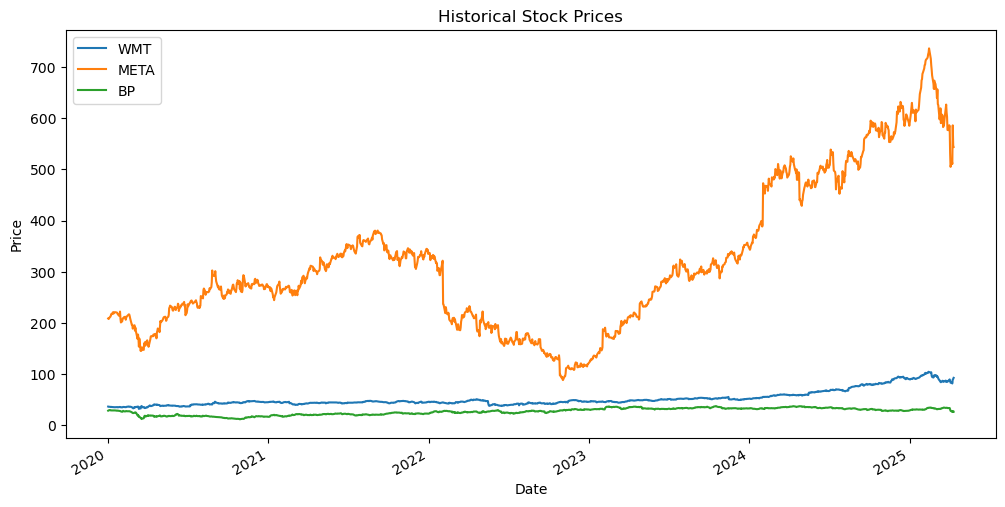

In [8]:
pf_data.plot(figsize =(12,6))
plt.title('Historical Stock Prices')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

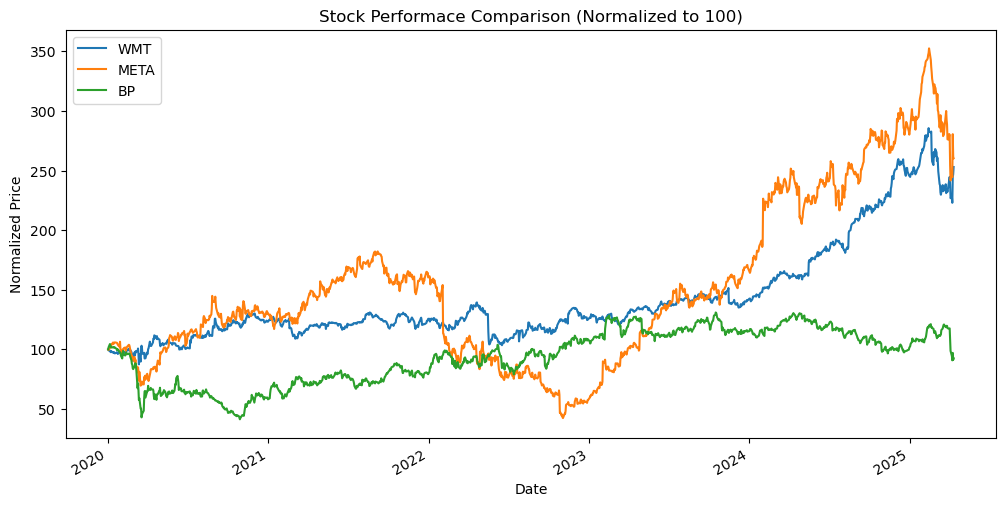

In [9]:
(pf_data/pf_data.iloc[0]*100).plot(figsize =(12,6))
plt.title('Stock Performace Comparison (Normalized to 100)')
plt.ylabel('Normalized Price')
plt.xlabel('Date')
plt.show()

## Calculating Portfolio log returns, Average Daily Returns & Annualized Returns

In [11]:
def calculate_returns(pf_data, tdays):
    log_returns = np.log(pf_data / pf_data.shift(1))
    average_daily_returns = log_returns.mean()
    annualized_returns = average_daily_returns * tdays
    
    print("\n=== Returns Metrics ===")
    print("\nDaily log returns:") 
    print(log_returns.tail())
    
    print(f"\nAverage returns (%):") 
    print(round(average_daily_returns * 100, 2))
    
    print(f"\nAnnual Average returns (%):")
    print(round(annualized_returns * 100, 2))
    
    return log_returns, average_daily_returns, annualized_returns

log_returns, average_daily_returns, annualized_returns = calculate_returns(pf_data, tdays)



=== Returns Metrics ===

Daily log returns:
                 WMT      META        BP
Date                                    
2025-04-07  0.007664  0.022567 -0.043571
2025-04-08 -0.024636 -0.011298 -0.039795
2025-04-09  0.091200  0.137635  0.066308
2025-04-10  0.011209 -0.069777 -0.061723
2025-04-11  0.023882 -0.004991  0.013631

Average returns (%):
WMT     0.07
META    0.07
BP     -0.01
dtype: float64

Annual Average returns (%):
WMT     17.64
META    18.18
BP      -1.48
dtype: float64


## Calculating Covariance and Correlation Matrices for the Portfolio

##### Covariance Matrix : Shows how the returns of different assets move together, a high the Covariance between 2 stocks means they tend to move together where as a negetive covariance means they move inversly to each other

##### Correlation Matrix: Measures linear relationship between the returns of 2 assets ranging from perfeclty positive (1) to perfect negetive (-1), zero meaning no correlation between them. This helps understand diversification potential of the assets

In [13]:
def cov_corr_matrix (log_returns,tdays):
    cov_matrix = log_returns.cov()*tdays
    # Covariance matrix: shows how asset returns move together.
    # Multiplied by tdays to annualize it
    corr_matrix = log_returns.corr() 
    # only shows relationship doesnt require yearly multiplication
    # Values range from -1 to 1; helps assess diversification.
        
    print('== Covariance Matrix ==')
    print(cov_matrix)
    print('\n== Correlation Matrix ==')
    print(corr_matrix)

    return cov_matrix,corr_matrix
    
cov_matrix, corr_matrix = cov_corr_matrix(log_returns,tdays)

== Covariance Matrix ==
           WMT      META        BP
WMT   0.054581  0.026281  0.013173
META  0.026281  0.207459  0.033010
BP    0.013173  0.033010  0.146048

== Correlation Matrix ==
           WMT      META        BP
WMT   1.000000  0.246971  0.147537
META  0.246971  1.000000  0.189642
BP    0.147537  0.189642  1.000000


# Portfolio Risk

### Calculations for Equally Wieighted Portfolio

In [16]:
def equal_distribution_portfolio (num_assets,log_returns,tdays):
    equal_weight = np.full(num_assets,1/num_assets)
    equal_returns = np.sum(equal_weight*log_returns.mean())*tdays
    equal_var=np.dot(equal_weight.T,np.dot(log_returns.cov()*tdays,equal_weight))
    equal_std=np.sqrt(equal_var)
    equal_labels = pd.Series(np.round(equal_weight*100, 2), index=portfolio)
    
    print('\n=== Weight Distribution (%) ===')
    print(equal_labels)  
    print(f"\nSum of Weights : {round(equal_weight.sum(), 2)}")
    print('\n=== Portfolio Metrics ===')
    print(f"Annualized Returns of Equally Weighted Portfolio: {round(equal_returns*100,2)} %")
    print(f"Expected annual Variance for this portfolio: {round(equal_var*100,2)} %")
    print(f"Expected standard deviation (Risk) for this portfolio: {round(equal_std*100,2)} %")
    

    return equal_weight,equal_returns,equal_var

equal_weight ,equal_returns, equal_var= equal_distribution_portfolio(num_assets,log_returns,tdays)


=== Weight Distribution (%) ===
WMT     33.33
META    33.33
BP      33.33
dtype: float64

Sum of Weights : 1.0

=== Portfolio Metrics ===
Annualized Returns of Equally Weighted Portfolio: 11.45 %
Expected annual Variance for this portfolio: 6.14 %
Expected standard deviation (Risk) for this portfolio: 24.79 %


### Single randomized Weight distribution for Portfolio

##### This randomiwed weight distribution simulates an alternative to an equally weighted portfolio, it illustrates how a person might invest based on their own intuition rather than a calculated distribution.

In [18]:
def random_distribution_portfolio (num_assets,log_returns,tdays):
    rand_weight = np.random.random(num_assets)
    rand_weight /=sum(rand_weight)
    rand_returns = np.sum(rand_weight*log_returns.mean())*tdays
    rand_var=np.dot(rand_weight.T,np.dot(log_returns.cov()*tdays,rand_weight))
    rand_std=np.sqrt(rand_var)
    rand_labels = pd.Series(np.round(rand_weight*100, 2), index=portfolio)

    print('\n=== Weight Distribution (%) ===')
    print(rand_labels)  
    print(f"\nSum of Weights : {round(rand_weight.sum(), 2)}")
    print('\n=== Portfolio Metrics ===')
    print(f"Annualized Returns of Random Weighted Portfolio: {round(rand_returns*100,2)} %")
    print(f"Expected annual Variance for this portfolio: {round(rand_var*100,2)} %")
    print(f"Expected standard deviation (Risk) for this portfolio: {round(rand_std*100,2)} %")
    

    return rand_weight,rand_returns,rand_var

rand_weight ,rand_returns, rand_var= random_distribution_portfolio(num_assets,log_returns,tdays)


=== Weight Distribution (%) ===
WMT     39.25
META    32.89
BP      27.86
dtype: float64

Sum of Weights : 1.0

=== Portfolio Metrics ===
Annualized Returns of Random Weighted Portfolio: 12.49 %
Expected annual Variance for this portfolio: 5.79 %
Expected standard deviation (Risk) for this portfolio: 24.06 %


## Using Monte Carlo Simulation for Portfolio Risk-Return based on 1000 combinations

In [20]:
pf_returns =[]
pf_risk =[]
pf_weights =[]

for i in range(iterations):
    sim_weights = np.random.random(num_assets)
    sim_weights /= np.sum(sim_weights)
    pf_weights.append(sim_weights)
    pf_returns.append(np.sum(sim_weights * log_returns.mean()) *tdays)
    pf_risk.append(np.sqrt(np.dot(sim_weights.T, np.dot(log_returns.cov()*tdays, sim_weights))))

pf_returns =np.array(pf_returns)
pf_risk = np.array(pf_risk)
pf_weights = np.array(pf_weights)

sim_portfolio = pd.DataFrame({'Return':pf_returns, 'Risk' :pf_risk})
sim_portfolio

,Return,Risk
0,0.113706,0.283663
1,0.125660,0.288834
2,0.125223,0.233173
3,0.136394,0.236307
4,0.165799,0.274182
...,...,...
995,0.125311,0.247717
996,0.150982,0.258191
997,0.091322,0.296364
998,0.073677,0.286307


## Efficent Frontier Curve for risk/return relationship

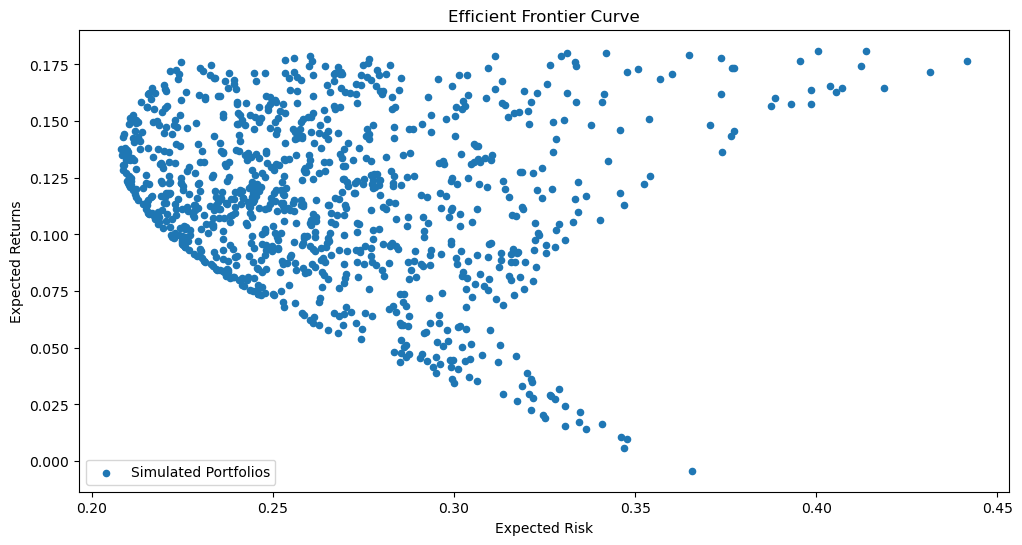

In [22]:
sim_portfolio.plot(x='Risk',y='Return',kind='scatter',figsize=(12,6), label='Simulated Portfolios')
plt.title('Efficient Frontier Curve')
plt.ylabel('Expected Returns')
plt.xlabel('Expected Risk')
plt.legend()
plt.show()

## Calulating Optimal portfolio and plotting the Captial Allocation line

### Sharpe Ratio Calculation

In [25]:
sharpe_ratio = (pf_returns-rf)/pf_risk # (Portfolio Returns - Risk Free Rate / Portfolio Risk(Volatility) )
sim_portfolio_cal = pd.DataFrame({'Return':pf_returns, 'Risk' :pf_risk,'Sharpe_Ratio': sharpe_ratio})
sim_portfolio_cal.head()

,Return,Risk,Sharpe_Ratio
0,0.113706,0.283663,0.294773
1,0.125660,0.288834,0.330881
2,0.125223,0.233173,0.407992
3,0.136394,0.236307,0.449856
4,0.165799,0.274182,0.494958


In [26]:
max_sharpe = sim_portfolio_cal['Sharpe_Ratio'].max()
min_sharpe = sim_portfolio_cal['Sharpe_Ratio'].min()
min_risk = sim_portfolio_cal['Risk'].min()

max_sharpe_portfolio = sim_portfolio_cal.loc[sim_portfolio_cal['Sharpe_Ratio'] == max_sharpe]
min_sharpe_portfolio = sim_portfolio_cal.loc[sim_portfolio_cal['Sharpe_Ratio'] == min_sharpe]
min_risk_portfolio = sim_portfolio_cal.loc[sim_portfolio_cal['Risk'] == min_risk]

print(f'Max Sharpe Portfolio (Optimal Portfolio):\n{max_sharpe_portfolio}')
print(f'\nMin Sharpe Portfolio (Least Efficient):\n{min_sharpe_portfolio}')
print(f'\nMin Risk Portfolio (Safe Portfolio):\n{min_risk_portfolio}')

Max Sharpe Portfolio (Optimal Portfolio):
       Return      Risk  Sharpe_Ratio
238  0.176268  0.224713      0.650511

Min Sharpe Portfolio (Least Efficient):
       Return      Risk  Sharpe_Ratio
538 -0.004261  0.365835     -0.093899

Min Risk Portfolio (Safe Portfolio):
       Return      Risk  Sharpe_Ratio
813  0.137808  0.208146      0.517514


## Tangency Portfolio

In [28]:
tangency_return = max_sharpe_portfolio['Return'].values[0]
tangency_risk = max_sharpe_portfolio['Risk'].values[0]
tangency_return,tangency_risk

(0.17626802854636472, 0.22471275416235736)

## Capital Allocation Line equation

In [30]:
# Generate points for the CAL line
cal_risk = np.linspace(0, 1.5 * tangency_risk, 100)  # X-axis (volatility)
cal_return = rf + (tangency_return - rf) / tangency_risk * cal_risk  # Y-axis (return)

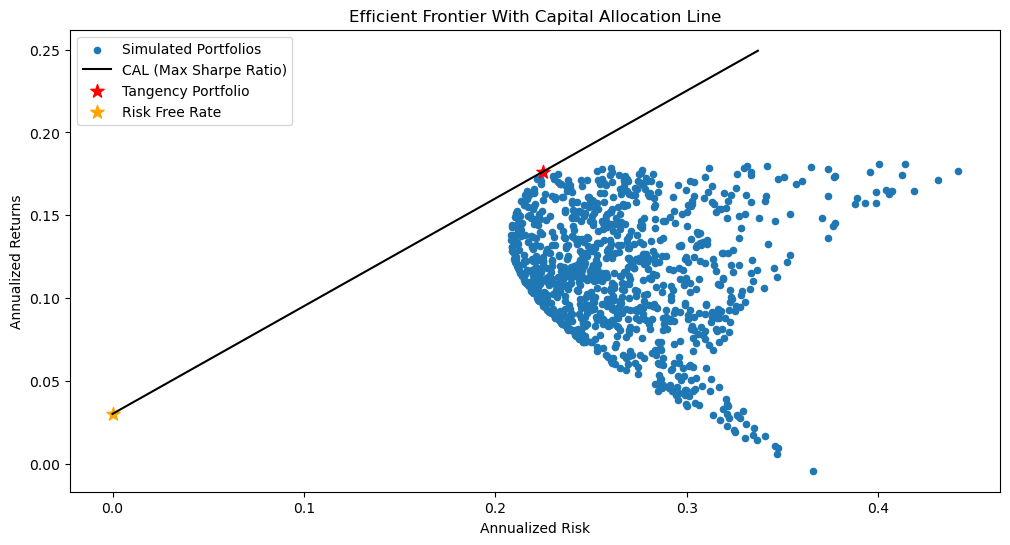

In [31]:
sim_portfolio.plot(x='Risk',y='Return',kind='scatter',figsize=(12,6),label = "Simulated Portfolios")
plt.plot(cal_risk, cal_return,label='CAL (Max Sharpe Ratio)', color='black')
plt.scatter(tangency_risk, tangency_return, marker= '*', label ="Tangency Portfolio", s=100, color = 'red' )
plt.scatter(0, rf, marker= '*', label ="Risk Free Rate", s=100, color='orange' )
plt.title('Efficient Frontier With Capital Allocation Line')
plt.ylabel('Annualized Returns')
plt.xlabel('Annualized Risk')
plt.legend(loc='upper left')
plt.show()

## Optimal Portfolio Asset Weights 

In [33]:
max_sharpe_idx = sim_portfolio_cal['Sharpe_Ratio'].idxmax()
tangency_weights =pf_weights[max_sharpe_idx]
weights_df = pd.DataFrame({'Asset': portfolio, 'Weight (%)': np.round(tangency_weights*100,2)})
print('===Portfolio Weights===')
print(weights_df)
print(f"Sum of weights  = {round(tangency_weights.sum()*100,2)} %")

tangency_return = sim_portfolio_cal.loc[max_sharpe_idx,"Return"]
tangency_risk = sim_portfolio_cal.loc[max_sharpe_idx,"Risk"]
tangency_sharpe = sim_portfolio_cal.loc[max_sharpe_idx,"Sharpe_Ratio"]
print(f"\n=== Performance Metrics ===")
print(f"Expected Annual Return: {round(tangency_return * 100, 2)}%")
print(f"Annual Volatility: {round(tangency_risk * 100, 2)}%")
print(f"Sharpe Ratio: {round(tangency_sharpe, 2)}")

===Portfolio Weights===
  Asset  Weight (%)
0   WMT       84.08
1  META       15.42
2    BP        0.50
Sum of weights  = 100.0 %

=== Performance Metrics ===
Expected Annual Return: 17.63%
Annual Volatility: 22.47%
Sharpe Ratio: 0.65


## Comparison between difference allocations to an Index

In [35]:
index = yf.download(benchmark,start=start_date,end=end_date,auto_adjust=False)['Adj Close'] 

[*********************100%***********************]  1 of 1 completed


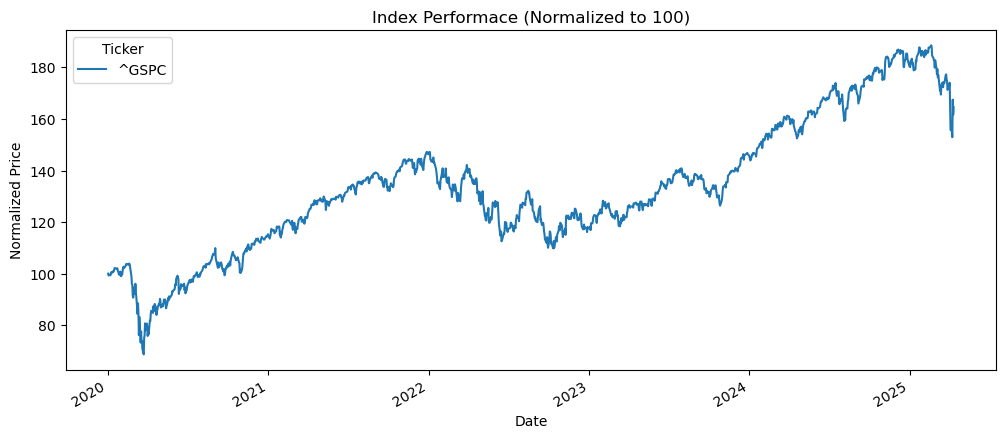

In [36]:
(index/index.iloc[0]*100).plot(figsize =(12,5))
plt.title('Index Performace (Normalized to 100)')
plt.ylabel('Normalized Price')
plt.xlabel('Date')
plt.show()

In [37]:
benchmark_returns = np.log(index/index.shift(1))
benchmark_returns.tail()

Ticker,^GSPC
Date,
2025-04-07,-0.002334
2025-04-08,-0.015825
2025-04-09,0.090895
2025-04-10,-0.035221
2025-04-11,0.017930


### Cumulative returns for portfolios

In [39]:
equal_cum_returns = (log_returns*equal_weight).sum(axis=1).cumsum()
rand_cum_returns  = (log_returns*rand_weight).sum(axis=1).cumsum()
max_sharpe_cum_returns =(log_returns*tangency_weights).sum(axis=1).cumsum()
benchmark_cum_returns =(np.log(index/index.shift(1)).cumsum())

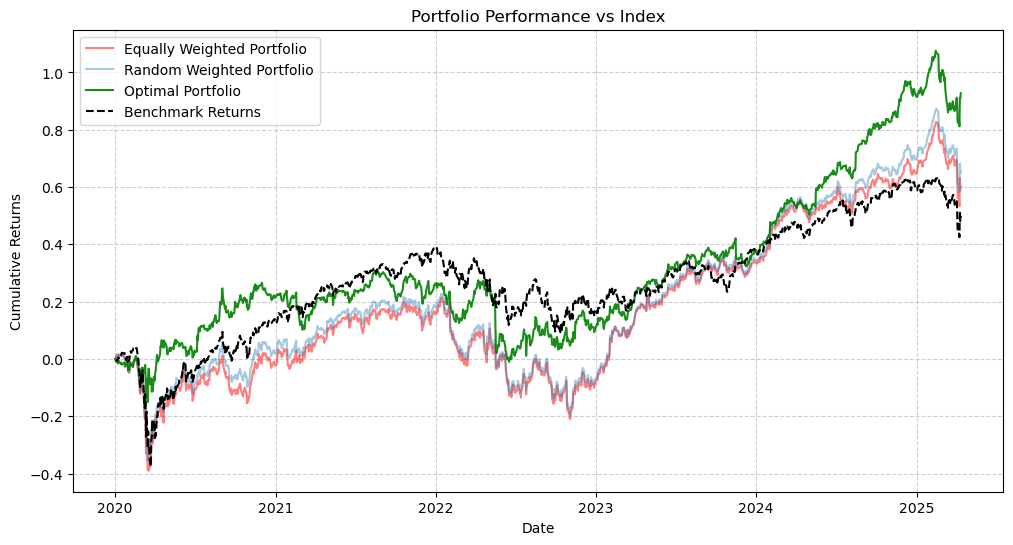

In [40]:
plt.figure(figsize=(12,6))
plt.plot(equal_cum_returns, label= "Equally Weighted Portfolio",alpha=0.5,color='red')
plt.plot(rand_cum_returns, label= "Random Weighted Portfolio",alpha=0.4)
plt.plot(max_sharpe_cum_returns, label= "Optimal Portfolio",alpha=0.9,color='green')
plt.plot(benchmark_cum_returns, label= "Benchmark Returns",alpha=1,linestyle="--",color='black')
plt.title('Portfolio Performance vs Index')
plt.ylabel('Cumulative Returns')
plt.xlabel('Date')
plt.grid(linestyle='--', alpha=0.6)
plt.legend()
plt.show()

## Capital Allocation to Tangecy Portfolio

In [42]:
capital_alloc= capital * tangency_weights
alloc_df=pd.DataFrame({'Asset':portfolio, 'Weight (%)':np.round(tangency_weights*100,2), 'Amount ($)':np.round(capital_alloc,2)})
print("=== Capital Allocation Based on Optimal Portfolio ===")
alloc_df

=== Capital Allocation Based on Optimal Portfolio ===


,Asset,Weight (%),Amount ($)
0,WMT,84.08,8407.76
1,META,15.42,1541.80
2,BP,0.50,50.43


In [43]:
portfolio_returns = log_returns.dot(tangency_weights)
portfolio_cum_returns = np.exp(portfolio_returns.cumsum())*capital
benchmark_cum_returns=np.exp(benchmark_cum_returns)*capital

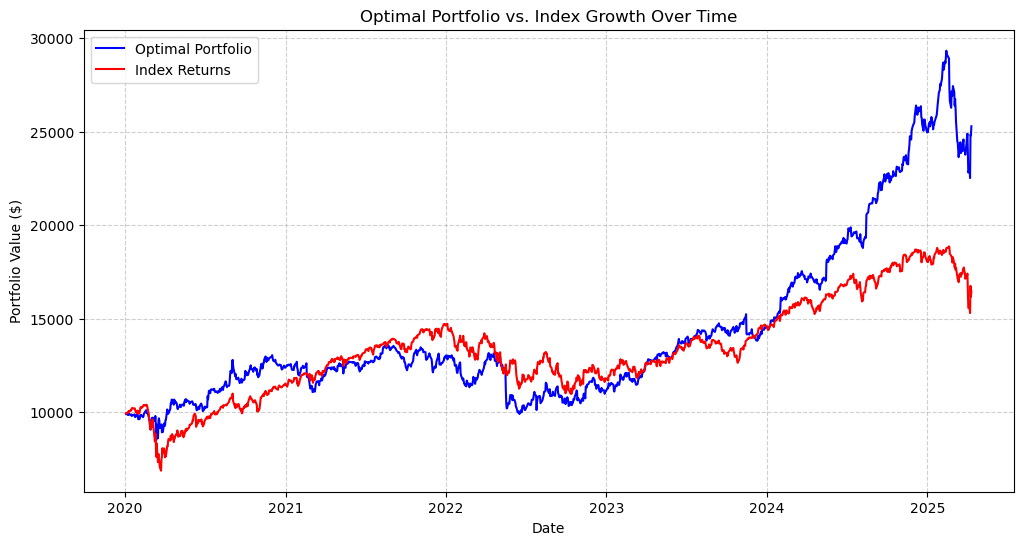

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(portfolio_cum_returns, label="Optimal Portfolio", color='blue')
plt.plot(benchmark_cum_returns, label="Index Returns", color='red')
plt.title('Optimal Portfolio vs. Index Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(linestyle='--', alpha=0.6)
plt.show()

In [75]:
current_pf_prices = pf_data.iloc[-1]
initial_pf_prices = pf_data.iloc[0]
current_idx_prices = index.iloc[-1]
initial_idx_prices = index.iloc[0]
pf_growth = current_pf_prices/initial_pf_prices
index_growth = current_idx_prices/initial_idx_prices
print('=== Optimal Portfolio vs Index Growth Comparison ===\n')

portfolio_index_comparison = pd.DataFrame({
    'Asset':portfolio + ['Index'],
    'Weight (%)': list(np.round(tangency_weights*100,2))+[100],
    'Initial Investment ($)':list(np.round(capital_alloc,2))+[capital],
    'Current Amount($)':list(np.round(capital_alloc*pf_growth,2)) + [np.round(capital*index_growth,2).values[0]] })
portfolio_index_comparison

=== Optimal Portfolio vs Index Growth Comparison ===



,Asset,Weight (%),Initial Investment ($),Current Amount($)
0,WMT,84.08,8407.76,21270.48
1,META,15.42,1541.80,4013.86
2,BP,0.50,50.43,46.65
3,Index,100.00,10000.00,16462.88
